# Astronomical Spectroscopy

https://en.wikipedia.org/wiki/Astronomical_spectroscopy

Spectroscopy studies properties of matter through its
interaction with different frequency components of the
electromagnetic spectrum. Astronomical spectroscopy
measures the spectrum of electromagnetic radiation of
hot celestial objects. This information is then used to
derive chemical composition, temperature,
distance, relative motion and so on.

## Electromagnetic Radiation and Spectrum

http://astronomy.swin.edu.au/cosmos/

Electromagnetic radiation is pair of electric and magnetic
fields that propagate together at the speed of light
($ c = 299 792 458 ms^{-1} $).
Visible light, radio waves, X-rays and gamma rays are
examples of electromagnetic radiation. Electromagnetic
spectrum is collective term for known range of
electromagnetic radiation. The electric and magnetic field
oscillates and produces electromagnetic waves.

The electromagnetic wave is describe in terms of frequency
or wavelength.

* Frequency ($f$) is the number of waves per second and
its unit is Hertz.
* Wavelength ($\lambda$) is the distance between successive
crests or troughs in the wave and it is meausred is meters
or astronomy usually uses Angstrom.

$$ 1 \unicode{x212B} = 10^{-10} m $$

Frequency and wavelength are related by wave equation:

$$ c = \lambda f $$

## Blackbody Radiation

A blackbody is a hypothetical object which is a perfect
absorber and emitter of radiation over all wavelengths.
The spectral flux distribution of blackbody's thermal
energy depends on its temperature.

Stars are often modelled as blackbodies in astronomy.
Their spectrum approximates the blackbody spectrum.

In [1]:
import numpy as np
import astropy.units
import astropy.analytic_functions

/usr/local/lib/python3.4/dist-packages/astropy/analytic_functions/blackbody.py:30: RuntimeWarning: overflow encountered in expm1
  _has_buggy_expm1 = np.isnan(np.expm1(1000))


In [2]:
wavelens = np.linspace(100, 30000, num=1000)
temperature = np.array([5000, 4000, 3000]).reshape(3, 1)
with np.errstate(all='ignore'):
    flux_lam = astropy.analytic_functions.blackbody_lambda(
        wavelens,
        temperature
    )

In [3]:
import matplotlib.pyplot as plt
%matplotlib nbagg

<IPython.core.display.Javascript object>


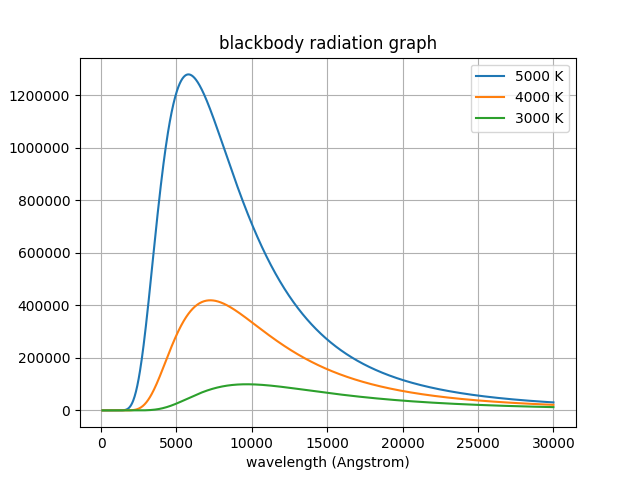

In [7]:
for flux, temp in zip(flux_lam, temperature.ravel()):
    plt.plot(wavelens, flux, label='{} K'.format(temp))
plt.legend()
plt.xlabel('wavelength (Angstrom)')
plt.ylabel('flux')
plt.title('blackbody radiation graph')
plt.grid()

## Spectral Lines

A spectral line can be used to identify the chemical
composition of stars. If a light from a star is separeted
with a prism its spectrum of colours is crossed with
discrete lines. This can be also visualized as itensities
of particural wavelengths.

In [10]:
import glob
import astropy.io.fits
import astropy.wcs

HISTORY1                                                                         [astropy.io.fits.card]
HISTORY2                                                                         [astropy.io.fits.card]


<IPython.core.display.Javascript object>


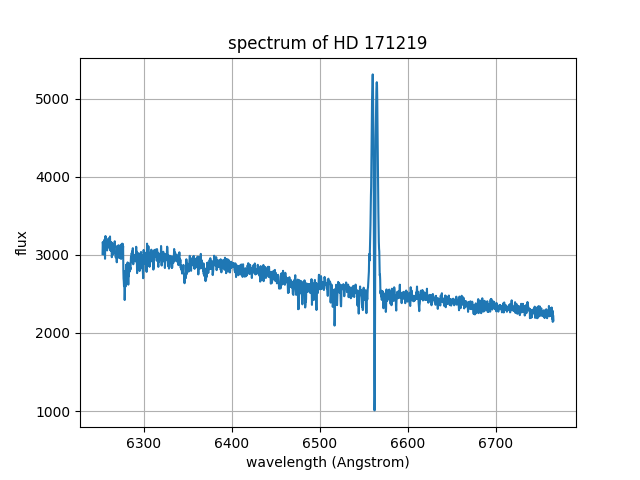

In [24]:
with astropy.io.fits.open(
    'ondrejov-ccd700/raw/vc220048.fit'
) as hdulist:
    header = hdulist[0].header
    wcs = astropy.wcs.WCS(header)
    plt.plot(
        wcs.wcs_pix2world(range(header['NAXIS1']), 0)[0],
        hdulist[0].data
    )
    plt.xlabel('wavelength (Angstrom)')
    plt.ylabel('flux')
    plt.title('spectrum of {}'.format(header['OBJECT']))
    plt.grid()